In [1]:
# This file is a modified version of the original:
# https://www.kaggle.com/code/mvvppp/icecube-neutrinos-domain-eda-for-ds-folks

<h1 style="font-family:calibri;font-size:250%;text-align:center;">❄️IceCube Neutrinos - Domain & EDA for DS folks</h1>

<a id="table"></a>
<h1 style="background-color:lightskyblue;font-family:calibri;font-size:250%;text-align:center;border-radius: 25px 25px;">Table of Contents</h1>

* [1. Introduction](#1)
    
    * [1.1 What is this notebook about and why do I do that](#1.1)
    
    * [1.2 Sources of information and inspiration](#1.2)

* [2. Domain information](#2)

    * [2.1 What is neutrino](#2.1)
    
    * [2.2 What is IceCube laboratory](#2.2)

* [3. Data exploration](#3)
    
    * [3.1 Explore sensors](#3.1)
    
    * [3.2 Explore train data](#3.2)
    
    * [3.3 Explore metadata](#3.3)

* [4. Break down an event](#4)

<a id="2.1"></a>
## <p style="padding:10px;background-color:lightskyblue;margin:0;color:black;font-family:calibri;font-size:120%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">2.1 What is neutrino</p>

Neutrinos are elementary particles like protons or electrons that fill our world. Unlike electrons, they have no electric charge. They are also very light and small (much smaller than electrons). They move at a speed close to the speed of light, but they are invisible to our eyes. Because neutrinos are tiny, light, and do not carry an electric charge, they are able to pass through large objects such as planets (i.e., are not absorbed by matter or deflected by magnetic fields.), however, they are tough to catch. 

<img src="https://neutrinos.fnal.gov/wp-content/uploads/2018/04/NeutrinoArePoster_Final_v2-web.jpg" alt="neutrino is picture" align="center" width="700"/>

Source - https://neutrinos.fnal.gov/whats-a-neutrino/

Neutrinos occur during nuclear reactions, such as decay or fusion. During these reactions, energy arises, and a neutrino takes part of this energy with it and flies away.

<img src="http://www.scienceinschool.org/wp-content/uploads/2011/05/issue19neutrinos12_l.jpg" alt="neutrino is picture" align="center" width="700"/>

Because nuclear reactions of various scales occur everywhere from the fusion of hydrogen atoms in the Sun to a banana, which also has nuclear reactions and neutrinos. Therefore, neutrinos fly past our bodies all the time. Their number is even greater than the number of atoms in the universe. However, scientists are interested in neutrinos with more energy, which have arisen in connection with more extreme cases, such as the explosion of a supernova or radiation from a black hole.

Neutrinos move really with near-to-light speed and almost never interact with another particle, due to their weight and size. So, it's really hard to spot them. And it's a place, where IceCube laboratory comes into the game.

<a id="2.2"></a>
## <p style="padding:10px;background-color:lightskyblue;margin:0;color:black;font-family:calibri;font-size:120%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">2.2 What is IceCube laboratory</p>

IceCube is an laboratory in Antarctica. At a depth of 1,450 to 2,450 m, deep in the ice, 5,160 digital optical modules (DOM) were placed on threads one above the other. Optical modules catch the blue glow, which is the result of Cherenkov radiation, which occurs in connection with the passage of neutrinos through the layer of ice.

Due to the dense nature of ice, high-energy neutrinos from space strike the nucleus of atoms in the ice and break down into an array of highly energetic particles that radiate light.

<img src="https://storage.googleapis.com/kaggle-media/competitions/IceCube/icecube_detector.jpg" align="center" width="700"/>

Why is it located in the South Pole?

The reason has to do with light absorption length, the average distance light travels in ice.

    In tap water light travels 2 meters.
    In distilled water light travels 8 meters.
    In ice beneath the South Pole light travels between 100 and 200 meters!

The south pole offers a massive amount of ultra pure ice which can hardly be reproduced by humans and this is the reason why it was built here.

<a id="3"></a>
## <p style="padding:10px;background-color:lightskyblue;margin:0;color:black;font-family:calibri;font-size:120%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">3. Data Exploration</p>

In [2]:
import os
import random
import math
from pathlib import Path
from collections import Counter

from tqdm import tqdm
import pandas as pd
import numpy as np
import pyarrow.parquet as pq

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set_style("darkgrid")

In [3]:
data_path = Path("/kaggle/input/icecube-neutrinos-in-deep-ice/")

<a id="3.1"></a>
## <p style="padding:10px;background-color:lightskyblue;margin:0;color:black;font-family:calibri;font-size:120%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">3.1 Explore sensors</p>

First of all, let's check out sensors information, located in sensors_geometry.csv file

In [4]:
sensor_geometry = pd.read_csv(data_path / "sensor_geometry.csv")
print(f"Shape: {sensor_geometry.shape}")
sensor_geometry.head(10)

Shape: (5160, 4)


,sensor_id,x,y,z
0,0,-256.14,-521.08,496.03
1,1,-256.14,-521.08,479.01
2,2,-256.14,-521.08,461.99
3,3,-256.14,-521.08,444.97
4,4,-256.14,-521.08,427.95
5,5,-256.14,-521.08,410.93
6,6,-256.14,-521.08,393.91
7,7,-256.14,-521.08,376.88
8,8,-256.14,-521.08,359.86
9,9,-256.14,-521.08,342.84


As we see, there are really 5160 DOMs and each DOM has its own id. Each DOM has a location by x, y, and z in units of meters, with the origin at the center of the IceCube detector. The coordinate system is right-handed, and the z-axis points upwards when standing at the South Pole.

Let's look at this sensors on 3D plot

In [5]:
fig = px.scatter_3d(sensor_geometry, x='x', y='y', z='z', color="z", opacity=0.75)
fig.update_traces(marker_size=3)
fig.show()

There are strings, where sensors go one by one by the z-axis. Interestingly, there are 86 strings of sensors, which looks different. They have lower distances between sensors but are located at some particular parts of the z-axis. As we see, the coordinates are normalized, and in reality position of these sensors is between 1450-2450 meters by the z-axis.

Also, we can check out ranges, where these sensors are located

In [6]:
print(f'X axis: top {sensor_geometry["x"].max()} bottom {sensor_geometry["x"].min()}')
print(f'Y axis: top {sensor_geometry["y"].max()} bottom {sensor_geometry["y"].min()}')
print(f'Z axis: top {sensor_geometry["z"].max()} bottom {sensor_geometry["z"].min()}')

X axis: top 576.37 bottom -570.9
Y axis: top 509.5 bottom -521.08
Z axis: top 524.56 bottom -512.82


<a id="3.2"></a>
## <p style="padding:10px;background-color:lightskyblue;margin:0;color:black;font-family:calibri;font-size:120%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">3.2 Explore train data</p>

Train data is stored in the train folder, where data is separated into batches. First of all, let's count the number of batches

In [7]:
def count_batches(path):
    counter = 0
    for item in path.glob('*'):
        if item.is_file():
            counter += 1
    return counter

print(f'Batches in train folder: {count_batches(data_path / "train")}')
print(f'Batches in test folder: {count_batches(data_path / "test")}')

Batches in train folder: 660
Batches in test folder: 1


Now let's examine the structure of one batch

In [8]:
train_batch = pd.read_parquet(data_path / "train" / "batch_1.parquet")
print(f"Shape: {train_batch.shape}")
train_batch.head(10)

Shape: (32792416, 4)


,sensor_id,time,charge,auxiliary
event_id,,,,
24,3918,5928,1.325,True
24,4157,6115,1.175,True
24,3520,6492,0.925,True
24,5041,6665,0.225,True
24,2948,8054,1.575,True
24,860,8124,0.675,True
24,2440,8284,1.625,True
24,1743,8478,0.775,True
24,3609,8572,1.025,True


In [9]:
test_batch = pd.read_parquet(data_path / "test" / "batch_661.parquet")
print(f"Shape: {test_batch.shape}")
test_batch.head(10)

Shape: (378, 4)


,sensor_id,time,charge,auxiliary
event_id,,,,
2092,4066,6170,1.275,True
2092,3512,6374,0.975,True
2092,897,6378,1.475,True
2092,2060,6590,0.925,True
2092,3072,6625,1.075,True
2092,2181,6690,1.425,True
2092,2145,7425,0.225,True
2092,4366,7430,1.025,True
2092,367,7544,0.725,True


Each batch contains tens of thousands of events. Each event may contain thousands of pulses, each of which is the digitized output from a photomultiplier tube and occupies one row. 

Each pulse has sensor_id of which of the 5160 IceCube photomultiplier sensors recorded the pulse. The time column indicates the time of the pulse in nanoseconds in the current event time window. The absolute time of a pulse has no relevance, and only the relative time with respect to other pulses within an event is of relevance.

The charge is an estimated amount of light (in the pulse) in units of photoelectrons (p.e). A physical photon does not exactly result in a measurement of 1 p.e. but rather can take values spread around 1 p.e. As an example, a pulse with charge 2.7 p.e. could quite likely be the result of two or three photons hitting the photomultiplier tube around the same time.

Auxiliary is a boolean column. If True, the pulse was not fully digitized, is of lower quality, and was more likely to originate from noise. If False, then this pulse was contributed to the trigger decision and the pulse was fully digitized.

Let's count events and pulses in the first batch.

In [10]:
print(f"Events in first batch: {train_batch.index.nunique()}")

Events in first batch: 200000


In [11]:
pulses_in_batch = pd.DataFrame(train_batch.groupby('event_id').size(), columns=["n_pulses"])

In [12]:
fig = px.histogram(
    pulses_in_batch,
    log_y=True,
    title="Number of pulses in events (log scale)"
)
fig.show()

As seen from the histogram, the most of events have from 1 to 1000 pulses, but there are events with more than 100,000 pulses. I think that condition, that each event may have a much different number of pulses will cause the model architecture to solve this problem.

In [13]:
event_time_lengthes = pd.DataFrame(train_batch.groupby('event_id')['time'].agg(np.ptp))

In [14]:
fig = px.histogram(
    event_time_lengthes,
    x="time",
    title="Length of events (in nanoseconds)"
)
fig.show()

As seen from hist, most of the events last for around 10,000 nanoseconds (0.00001 seconds). This graph looks different from the previous one, so it looks like there is no correlation between the length of the event and the number of pulses in the event. Let's check that out

In [15]:
event_time_lengthes.corrwith(pulses_in_batch["n_pulses"], axis=0)

time    0.265089
dtype: float64

Yes, there is not a big correlation between the number of pulses and the length of the event

<a id="3.3"></a>
## <p style="padding:10px;background-color:lightskyblue;margin:0;color:black;font-family:calibri;font-size:120%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">3.3 Explore metadata</p>

There are two metadata files, for train and test sets. Let's examine them

In [16]:
train_meta = pd.read_parquet(data_path / "train_meta.parquet")
print(f"Shape: {train_meta.shape}")
train_meta.head(5)

Shape: (131953924, 6)


,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
0,1,24,0,60,5.029555,2.087498
1,1,41,61,111,0.417742,1.549686
2,1,59,112,147,1.160466,2.401942
3,1,67,148,289,5.845952,0.759054
4,1,72,290,351,0.653719,0.939117


In [17]:
test_meta = pd.read_parquet(data_path / "test_meta.parquet")
print(f"Shape: {test_meta.shape}")
test_meta.head(5)

Shape: (3, 4)


,batch_id,event_id,first_pulse_index,last_pulse_index
0,661,2092,0,298
1,661,7344,299,334
2,661,9482,335,377


In metadata files stored information about every event. For every event, we have batch_id, which determines, in which batch this event pulses are stored. Also, it has the first and last pulse index, in the features dataframe belonging to this event. 

Finally, it has azimuth and zenith values. The direction vector represented by zenith and azimuth points to where the neutrino came from. Azimuth is the angle of the direction of the sun measured clockwise north from the horizon. Zenith angle measured from the local zenith and the line of sight of the sun. In our dataset, these values are given in radians. Azimuth values are between 0 and $2*pi$ and zenith values are between 0 and pi (because azimuth varies from 0° to 360° and zenith from 0° to 180°). These two angles determine the position of an object in the sky relative to an observer's location.

<img src="https://www.researchgate.net/publication/354755033/figure/fig2/AS:1070891857362948@1632331923300/Schematic-depicting-the-solar-zenith-angle-solar-altitude-angle-and-solar-azimuth-angle.ppm" alt="neutrino is picture" align="center" width="700"/>

We may plot the distribution of azimuth and zenith angles in the dataset

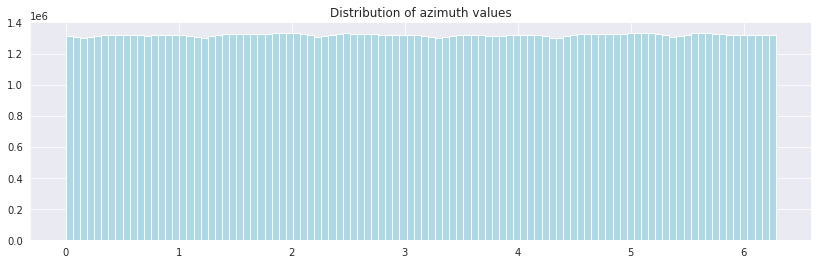

In [18]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.hist(train_meta["azimuth"], bins=100, color="lightblue")
ax.set_title("Distribution of azimuth values");

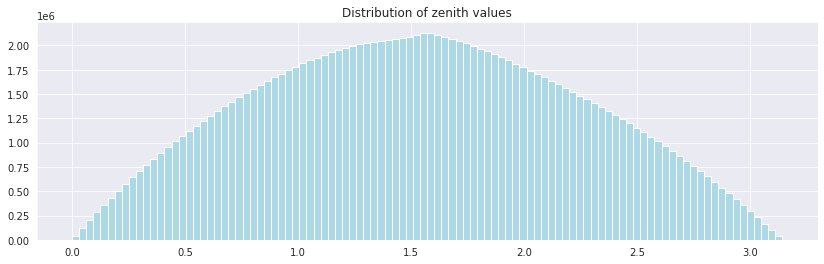

In [19]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.hist(train_meta["zenith"], bins=100, color="lightblue")
ax.set_title("Distribution of zenith values");

In [20]:
fig = px.scatter(train_meta.sample(1000), x="azimuth", y="zenith", marginal_x="violin", marginal_y="violin")
fig.show()

As we see, azimuth values are between 0 and $2*pi$ and zenith values are between 0 and pi.

The distribution of azimuth values is uniform, which means, there are equal numbers of events with any azimuth angles. But the distribution of zenith values has a more normal-like distribution. It means, that most of the neutrinos, detected by IceCube, go perpendicularly to the strings of DOMs. 

<a id="4"></a>
## <p style="padding:10px;background-color:lightskyblue;margin:0;color:black;font-family:calibri;font-size:120%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500">4. Break down an event</p>

Let's analyze some events to understand better, what these events look like.

First, we have to take some event id for our analysis

In [21]:
analyze_event_id = 24

In [22]:
meta_of_event = train_meta[train_meta["event_id"] == analyze_event_id]
meta_of_event

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
0,1,24,0,60,5.029555,2.087498


In [23]:
event_pulses = train_batch[train_batch.index == analyze_event_id]
event_pulses

,sensor_id,time,charge,auxiliary
event_id,,,,
24,3918,5928,1.325,True
24,4157,6115,1.175,True
24,3520,6492,0.925,True
24,5041,6665,0.225,True
24,2948,8054,1.575,True
...,...,...,...,...
24,3452,17812,0.725,True
24,48,18053,0.975,True
24,3267,18095,1.125,True


There are 61 pulses in this event. It could be worse, like 100,000 pulses😅

Now I want to create a function for events visualization

In [24]:
def visualize_event(pulse_id: str, sensor_geometry: pd.DataFrame, pulses_data: pd.DataFrame, meta_data: pd.DataFrame):
    event_pulses = pulses_data[pulses_data.index == pulse_id]
    meta_of_event = train_meta[train_meta["event_id"] == pulse_id]
    
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{"type": "scatter3d"}, {"type": "scatter3d"}]],
        subplot_titles=("All events", "Not auxiliary events")
    )
    
    aux_pulses_data = event_pulses[event_pulses["auxiliary"] == True]
    not_aux_pulses_data = event_pulses[event_pulses["auxiliary"] == False]
    aux_df = aux_pulses_data.merge(sensor_geometry, left_on='sensor_id', right_on='sensor_id')[["x", "y", "z", "charge", "time"]]
    not_aux_df = not_aux_pulses_data.merge(sensor_geometry, left_on='sensor_id', right_on='sensor_id')[["x", "y", "z", "charge", "time"]]

    fig.add_trace(
        go.Scatter3d(x=aux_df["x"], y=aux_df["y"], z=aux_df["z"], opacity=0.75, mode='markers', marker_size=aux_df["charge"]*10, text=aux_df["charge"], marker=dict(color=aux_df["time"], cmin=0, cmax=aux_df.iloc[-1]["time"])), row=1, col=1
    )
    fig.add_trace(
        go.Scatter3d(x=not_aux_df["x"], y=not_aux_df["y"], z=not_aux_df["z"], opacity=0.75, mode='markers', marker_size=not_aux_df["charge"]*10, text=aux_df["charge"], marker=dict(color=not_aux_df["time"], cmin=0, cmax=not_aux_df.iloc[-1]["time"])), row=1, col=2
    )
    fig.add_trace(
        go.Scatter3d(x=sensor_geometry["x"], y=sensor_geometry["y"], z=sensor_geometry["z"], mode='markers', opacity=0.3, marker=dict(size=1, color="gray")), row=1, col=1
    )
    fig.add_trace(
        go.Scatter3d(x=sensor_geometry["x"], y=sensor_geometry["y"], z=sensor_geometry["z"], mode='markers', opacity=0.3, marker=dict(size=1, color="gray")), row=1, col=2
    )

    azimuth, zenith = meta_of_event["azimuth"].values[0], meta_of_event["zenith"].values[0]
    true_x = math.cos(azimuth) * math.sin(zenith)
    true_y = math.sin(azimuth) * math.sin(zenith)
    true_z = math.cos(zenith)
    
    fig.add_trace(
        go.Scatter3d(
            x=[-true_x * 500, true_x * 500], y=[-true_y * 500, true_y * 500], z=[-true_z * 500, true_z * 500],
            opacity=0.8, mode='lines', line=dict(color='red', width=5)
        ),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter3d(
            x=[-true_x * 500, true_x * 500], y=[-true_y * 500, true_y * 500], z=[-true_z * 500, true_z * 500],
            opacity=0.8, mode='lines', line=dict(color='red', width=5)
        ),
        row=1, col=2
    )
    
    fig.update_layout(title_text=f"Event {pulse_id}")
    
    fig.show()

And now I can visualize the pulses and path of the neutrino particle of a few events:

Why are we doing astronomy with neutrinos when they are so hard to detect? Well, neutrinos don't have an electric charge so they are basically like photons the particle of light, so you apply the same astronomy. The critical difference is that neutrinos go through walls and light doesn't (60 billion solar neutrinos pass through 1cm2/sec), so they may reach us from places in the universe we have never seen before. IceCube is basically a big eye that looks at the sky and instead of seeing beams of light it sees beams of neutrinos."

High energy neutrinos produce a zoo of charged particles when they interact with the ice. These particles produce an explosion of light and IceCube captures it with its DOM sensors.

In [25]:
visualize_event(24, sensor_geometry, train_batch, train_meta)

The small, gray points indicate the positions of all 5160 IceCube sensors. The red arrow shows the true neutrino direction of that event, i.e. the regression target.

The colorful dots represent sensors that logged at least one pulse in the event. The size of the dots corresponds to the total charge of all pulses while the color indicates the time of the first pulse.

So, there are only 13 not auxiliary pulses from 61 pulses in total in this event. Also, it seems like the path of neutrino does not go through sensors, which detected pulse. So, now this task looks harder😉

In [26]:
visualize_event(41, sensor_geometry, train_batch, train_meta)

In [27]:
visualize_event(59, sensor_geometry, train_batch, train_meta)

In [28]:
visualize_event(67, sensor_geometry, train_batch, train_meta)

In [29]:
visualize_event(72, sensor_geometry, train_batch, train_meta)